In [1]:
from state_machine.leg_state_machine import Leg_State_Machine
from leg_controller import Leg_Controller
from mouse_parameters_dir import Gait_Parameters
from time import sleep
import numpy as np
import matplotlib.pyplot as plt

In [2]:
gait_parameters = Gait_Parameters()
general_st_parameters = gait_parameters.st_trot_parameters
front_leg_parameters = gait_parameters.st_trot_param_f
rear_leg_parameters = gait_parameters.st_trot_param_r

state_machine = Leg_State_Machine(general_st_parameters)


Initializing the leg state machine


ed time: 0.748 || Normalized delta time: 0.020757370002684183
Normalized time: 0.769 || Normalized delta time: 0.020885596997686662
Normalized time: 0.789 || Normalized delta time: 0.020755457997438498
Normalized time: 0.81 || Normalized delta time: 0.02081034900038503
Normalized time: 0.831 || Normalized delta time: 0.020783551000931766
Normalized time: 0.852 || Normalized delta time: 0.020638401998439804
Normalized time: 0.872 || Normalized delta time: 0.020805142004974186
Normalized time: 0.893 || Normalized delta time: 0.02098447699972894
Normalized time: 0.914 || Normalized delta time: 0.02086861499992665
Normalized time: 0.935 || Normalized delta time: 0.020689200995548163
Normalized time: 0.956 || Normalized delta time: 0.020990869001252577
Normalized time: 0.977 || Normalized delta time: 0.020698494001408108
Normalized time: 0.997 || Normalized delta time: 0.02063545199780492
Normalized time: 0.018 || Normalized delta time: 0.02093007100484101
Normalized time: 0.039 || Normaliz

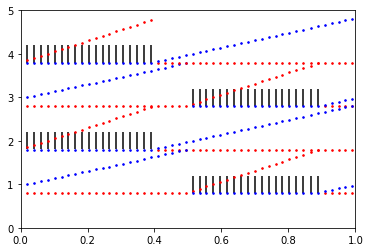

In [3]:
cycle_freq = 1
cycle_time = 1.0/cycle_freq

sub_units = 1000
results1 = np.zeros((sub_units))
results2 = np.zeros((sub_units))
results3 = np.zeros((sub_units))
results4 = np.zeros((sub_units))

axis = np.ones((sub_units))

time1 = np.zeros((sub_units))

time_leg1_swing = np.zeros((sub_units))
time_leg1_stance = np.zeros((sub_units))
time_leg2_swing = np.zeros((sub_units))
time_leg2_stance = np.zeros((sub_units))
time_leg3_swing = np.zeros((sub_units))
time_leg3_stance = np.zeros((sub_units))
time_leg4_swing = np.zeros((sub_units))
time_leg4_stance = np.zeros((sub_units))

state_machine.timer.reset_times()
timer = 0
for i in range(sub_units):
    sleep(0.02)
    state_machine.run_state_machine()
    timer += state_machine.get_delta_cycle_time()
    time_leg1_swing[i] = state_machine.leg_phase_timings_norm[0,0]
    time_leg1_stance[i] = state_machine.leg_phase_timings_norm[0,1]
    time_leg2_swing[i] = state_machine.leg_phase_timings_norm[1,0]
    time_leg2_stance[i] = state_machine.leg_phase_timings_norm[1,1]
    time_leg3_swing[i] = state_machine.leg_phase_timings_norm[2,0]
    time_leg3_stance[i] = state_machine.leg_phase_timings_norm[2,1]
    time_leg4_swing[i] = state_machine.leg_phase_timings_norm[3,0]
    time_leg4_stance[i] = state_machine.leg_phase_timings_norm[3,1]
    time1[i] = timer
    results1[i] = state_machine.leg_states[0]
    results2[i] = state_machine.leg_states[1] + 1.1
    results3[i] = state_machine.leg_states[2] + 2.2
    results4[i] = state_machine.leg_states[3] + 3.3

fig, ax = plt.subplots(nrows=1, ncols=1)
# ax.set_facecolor((1.0, 0.47, 0.42))
ax.scatter(time1,axis+2, c=results1, label='leg1', cmap="gray_r", linestyle='-',marker='|',s=300) # FL
ax.scatter(time1,axis+1,  c=results2, label='leg2',cmap="gray_r",linestyle='-',marker='|',s=300) # FR
ax.scatter(time1,axis+3, c=results3, label='leg3',cmap="gray_r",linestyle='-',marker='|',s=300) # RL
ax.scatter(time1,axis, c=results4, label='leg4',cmap="gray_r",linestyle='-',marker='|',s=300) # RR
ax.scatter(time1,time_leg1_stance+2.8, c="red",marker='.', s=10)
ax.scatter(time1,time_leg1_swing+2.8, c="blue", marker='.',s=10)
ax.scatter(time1,time_leg2_stance+1.8, c="red",marker='.', s=10)
ax.scatter(time1,time_leg2_swing+1.8, c="blue", marker='.',s=10)
ax.scatter(time1,time_leg3_stance+3.8, c="red",marker='.', s=10)
ax.scatter(time1,time_leg3_swing+3.8, c="blue", marker='.',s=10)
ax.scatter(time1,time_leg4_stance+0.8, c="red",marker='.', s=10)
ax.scatter(time1,time_leg4_swing+0.8, c="blue", marker='.',s=10)
ax.set_ylim(0,5)
ax.set_xlim(0,1.)
plt.show()

In [4]:
norm_time = 0.498
normalized_time_vector = np.ones((4,))*norm_time


In [5]:
state_machine.composite_H(norm_time)

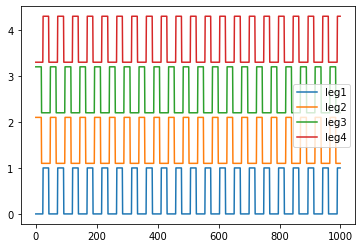

In [6]:
plt.plot(results1, label='leg1')
plt.plot(results2, label='leg2')
plt.plot(results3, label='leg3')
plt.plot(results4, label='leg4')
plt.legend()
plt.show()

In [7]:
a = np.array([[0,1],[2,3],[4,5],[6,7]])
b = np.array([0,1,1,0])
c = np.array([b,1-b]).T
q = np.array([2,3])
delta = 2
a = c*(a + delta)/q
print(a)

[[0. 1.]
 [2. 0.]
 [3. 0.]
 [0. 3.]]


In [8]:
leg_cycle_offset = np.array([0.,0.5,0.5,0.])
cycle_distr = 0.4
end = (leg_cycle_offset + cycle_distr)%1.0
stance_timings = np.array([1-cycle_distr,cycle_distr])
gait_exp = np.stack((end,leg_cycle_offset),axis=-1)+stance_timings
print(gait_exp)
gait_exp2 = gait_exp%1.0
print(gait_exp2)
gait_exp3 = -1*gait_exp2/stance_timings
print(gait_exp3)
gait_exp4 = gait_exp3 + 1
print(gait_exp4)

[[1.  0.4]
 [1.5 0.9]
 [1.5 0.9]
 [1.  0.4]]
[[0.  0.4]
 [0.5 0.9]
 [0.5 0.9]
 [0.  0.4]]
[[-0.         -1.        ]
 [-0.83333333 -2.25      ]
 [-0.83333333 -2.25      ]
 [-0.         -1.        ]]
[[ 1.          0.        ]
 [ 0.16666667 -1.25      ]
 [ 0.16666667 -1.25      ]
 [ 1.          0.        ]]


In [9]:

a = np.ones((4,2))
b = np.array([2,1])

for i in range(4):
    a[i,:] = b

print(a)

[[2. 1.]
 [2. 1.]
 [2. 1.]
 [2. 1.]]


In [1]:
from state_machine.leg_state_machine import Leg_State_Machine
from leg_controller import Leg_Controller
from mouse_parameters_dir import Gait_Parameters
from time import sleep
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Get the main parameters
gait_parameters2 = Gait_Parameters()
general_st_parameters2 = gait_parameters2.st_trot_parameters
front_leg_parameters2 = gait_parameters2.st_trot_param_f
rear_leg_parameters2 = gait_parameters2.st_trot_param_r

# Initialize the key components of the motion module
fsm = Leg_State_Machine(general_st_parameters2)
leg_controller = Leg_Controller(gait_parameters2)

Initializing the leg state machine
Initialized inverse leg kinematics
Constant import complete.
First pass FK complete.
New leg initialized
Constant import complete.
First pass FK complete.
New leg initialized
Constant import complete.
First pass FK complete.
New leg initialized
Constant import complete.
First pass FK complete.
New leg initialized
Initialized leg controller


In [3]:
n = 100
x1 = np.ones((n))
y1 = np.ones((n))
x2 = np.ones((n))
y2 = np.ones((n))
x3 = np.ones((n))
y3 = np.ones((n))
x4 = np.ones((n))
y4 = np.ones((n))
v_in = 0.05

fsm.timer.reset_times()
sleep(0.002)

# Loop methods
for i in range(n):
    v_in = 0.05*np.random.random()
    vel = v_in * np.ones((4,))
    leg_states, leg_timings = fsm.run_state_machine()
    target_leg_positions, q_values_leg = leg_controller.run_controller(leg_states, leg_timings, vel)
    print("Q-Values for legs: {}".format(q_values_leg))
    x1[i] = target_leg_positions[0,0]
    y1[i] = target_leg_positions[0,1]
    x2[i] = target_leg_positions[1,0]
    y2[i] = target_leg_positions[1,1]
    x3[i] = target_leg_positions[2,0]
    y3[i] = target_leg_positions[2,1]
    x4[i] = target_leg_positions[3,0]
    y4[i] = target_leg_positions[3,1]
    # sleep(0.02)



    0.02496874 -0.03946051]
 [ 0.          0.02516303 -0.03142219]]
Target leg positions: {} [[-0.00863736 -0.02626059]
 [-0.00136264 -0.04373941]
 [ 0.01363736 -0.05073941]
 [ 0.00636264 -0.03326059]]
Positional difference of target and goal: [[ 0.01114328 -0.00048386]
 [ 0.01861231 -0.00992435]
 [-0.01133137 -0.0112789 ]
 [-0.0188004  -0.0018384 ]]
Parmeters for the first leg:
Current q_values of the leg: [ 0.59768918 -0.71231349]
Q-Values for legs: [ 0.60213757 -0.71640789  0.55582729 -0.26633776 -0.4923864   0.31046162
 -0.54412542  0.88927614]
Normalized time: 0.332 || Normalized delta time: 0.005975387999569648
[0 1 1 0]
Current leg positions: [[ 0.         -0.01966485 -0.02577991]
 [ 0.         -0.01979015 -0.03391702]
 [ 0.          0.02485104 -0.03957616]
 [ 0.          0.02497634 -0.03143905]]
Target leg positions: {} [[-0.00898211 -0.02645227]
 [-0.00101789 -0.04354773]
 [ 0.01398211 -0.05054773]
 [ 0.00601789 -0.03345227]]
Positional difference of target and goal: [[ 0.0106

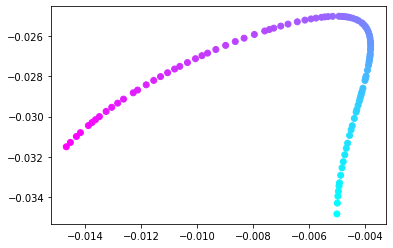

In [4]:
plt.scatter(x1,y1,c=np.arange(n), cmap="cool")
plt.show()

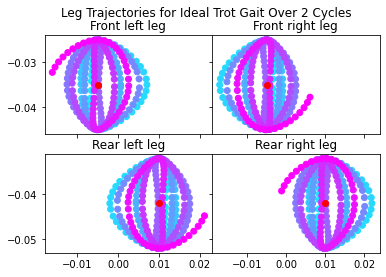

In [4]:
fig = plt.figure()
gs = fig.add_gridspec(2, 2, hspace=0.2, wspace=0)
(ax1, ax2), (ax3, ax4) = gs.subplots(sharex='col', sharey='row')
rear_leg_neutral_y = gait_parameters2.st_trot_param_r["neutral_stance_pos"]
rear_leg_neutral_x = gait_parameters2.st_trot_param_r["neutral_stride_pos"]

front_leg_neutral_y = gait_parameters2.st_trot_param_f["neutral_stance_pos"]
front_leg_neutral_x = gait_parameters2.st_trot_param_f["neutral_stride_pos"]

fig.suptitle('Leg Trajectories for Ideal Trot Gait Over 2 Cycles')
ax1.scatter(x1,y1,c=np.arange(n), cmap="cool")
ax1.scatter(front_leg_neutral_x,front_leg_neutral_y,c="red")
ax1.set_title("Front left leg")
ax2.scatter(x2,y2,c=np.arange(n), cmap="cool")
ax2.scatter(front_leg_neutral_x,front_leg_neutral_y,c="red")
ax2.set_title("Front right leg")
ax3.scatter(x3,y3,c=np.arange(n), cmap="cool")
ax3.scatter(rear_leg_neutral_x,rear_leg_neutral_y,c="red")
ax3.set_title("Rear left leg")
ax4.scatter(x4,y4,c=np.arange(n), cmap="cool")
ax4.scatter(rear_leg_neutral_x,rear_leg_neutral_y,c="red")
ax4.set_title("Rear right leg")

for ax in fig.get_axes():
    ax.label_outer()

In [5]:
name = {0: 2, '1': 3}
print(name[1])

KeyError: 1

In [2]:
import numpy as np
a = np.array([2,2])
print(type(-1))
print(type(a))

<class 'int'>
<class 'numpy.ndarray'>


In [1]:
print([0.0]*8)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [9]:
import numpy as np
abc = np.ones((4,2))
offset = (-2, -4)
abc[2,1] = abc[2,1] + offset[0]
abc[3,1] = abc[3,1] + offset[1]

print(type(abc))

<class 'numpy.ndarray'>


In [2]:
print(4%4)

0


In [5]:
import numpy as np
step=1.57/10
angles = np.arange(0,1.6,step)
r = 0.5
for i in angles:
    y = -r*np.sin(i)
    x = r*(np.cos(i)-1)
    print("x: {} || y: {}".format(x,y))

x: 0.0 || y: -0.0
x: -0.00614960262045261 || y: -0.0781779061376239
x: -0.024447140032252512 || y: -0.15443276004946607
x: -0.054442521899338014 || y: -0.22688881353777254
x: -0.09539790950598387 || y: -0.29376376285694594
x: -0.14630586541640012 || y: -0.353412590552683
x: -0.20591413483431248 || y: -0.4043680302765651
x: -0.27275644908046875 || y: -0.4453766592059831
x: -0.3451885934714879 || y: -0.475429730253235
x: -0.4214288523875618 || y: -0.49378798564046134
x: -0.49960183664463337 || y: -0.4999998414659173


In [4]:
import numpy as np

const = np.log10(2)
a = np.arange(2,4,0.05)
for i in a:
    b = const/np.log10(i)
    print("a: {} || b: {}".format(i,b))

a: 2.0 || b: 1.0
a: 2.05 || b: 0.9656014993512616
a: 2.0999999999999996 || b: 0.9342395088803245
a: 2.1499999999999995 || b: 0.9055209669194185
a: 2.1999999999999993 || b: 0.8791181557867747
a: 2.249999999999999 || b: 0.8547556456757278
a: 2.299999999999999 || b: 0.8322002502714239
a: 2.3499999999999988 || b: 0.8112532134176967
a: 2.3999999999999986 || b: 0.7917440691885582
a: 2.4499999999999984 || b: 0.7735257715366742
a: 2.4999999999999982 || b: 0.7564707973660307
a: 2.549999999999998 || b: 0.7404680032921999
a: 2.599999999999998 || b: 0.7254200712792541
a: 2.6499999999999977 || b: 0.7112414182894701
a: 2.6999999999999975 || b: 0.6978564744558172
a: 2.7499999999999973 || b: 0.6851982561085819
a: 2.799999999999997 || b: 0.6732071763541625
a: 2.849999999999997 || b: 0.6618300482901999
a: 2.899999999999997 || b: 0.6510192453942307
a: 2.9499999999999966 || b: 0.64073199089498
a: 2.9999999999999964 || b: 0.6309297535714581
a: 3.0499999999999963 || b: 0.6215777318241626
a: 3.09999999999999

In [3]:
import numpy as np
data = [0.02, 0.03, 0.04]
angle = [rad*180/np.pi for rad in data]
q_values = np.array((angle), dtype=int)
print(q_values)

[1 1 2]
